![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [7]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [8]:
#STEP 1
# Convert categorical column 'sex' into numeric using one-hot encoding
penguins_df = pd.get_dummies(penguins_df, columns=['sex'], drop_first=True)

# Standardizing the numerical columns
num_cols = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
scaler = StandardScaler()
penguins_df[num_cols] = scaler.fit_transform(penguins_df[num_cols])

# Display first few rows after preprocessing
print(penguins_df.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex_MALE
0         -0.903906         0.790360          -1.425342    -0.566948         1
1         -0.830434         0.126187          -1.068577    -0.504847         0
2         -0.683490         0.432728          -0.426399    -1.187953         0
3         -1.344738         1.096901          -0.569105    -0.939551         0
4         -0.867170         1.761074          -0.783164    -0.691149         1


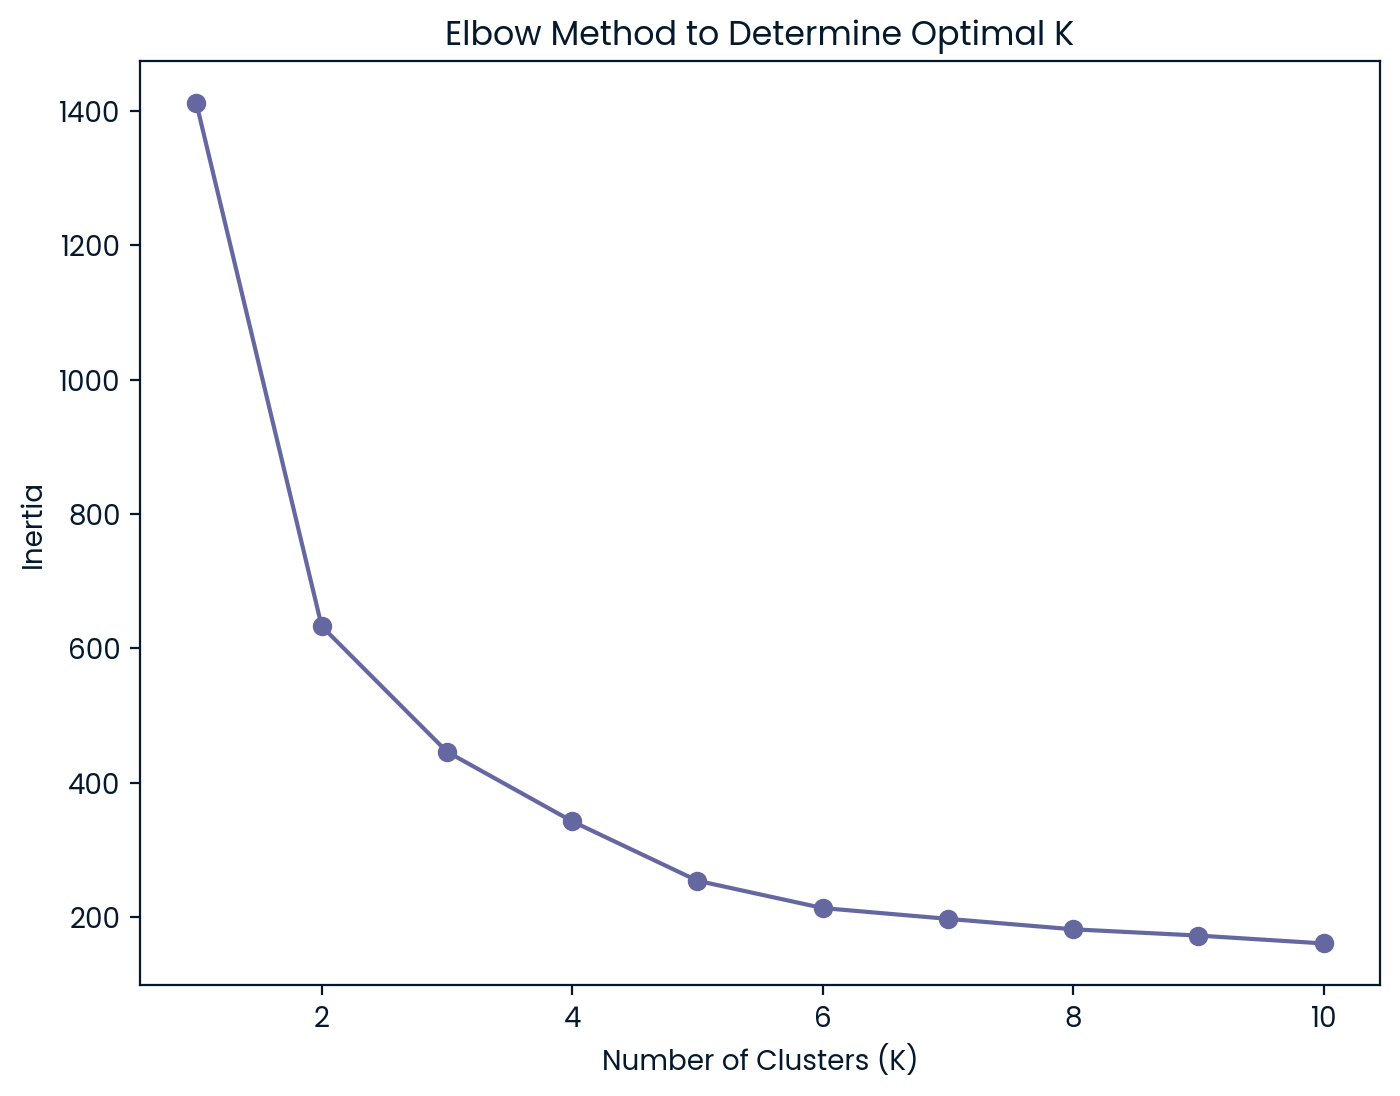

In [9]:
#STEP 2 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Finding the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)  # Testing K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(penguins_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.show()


In [10]:
#STEP3
# Set the optimal K based on the Elbow Method (choose the best value from the plot)
optimal_k = 3  # Update this based on your elbow curve

# Run K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
penguins_df["Cluster"] = kmeans.fit_predict(penguins_df)

# Display the first few rows with cluster assignments
print(penguins_df.head())


   culmen_length_mm  culmen_depth_mm  ...  sex_MALE  Cluster
0         -0.903906         0.790360  ...         1        2
1         -0.830434         0.126187  ...         0        2
2         -0.683490         0.432728  ...         0        2
3         -1.344738         1.096901  ...         0        2
4         -0.867170         1.761074  ...         1        2

[5 rows x 6 columns]


In [12]:
# Reload the original dataset (to get unscaled values)
stat_penguins = pd.read_csv("penguins.csv")  

stat_penguins = pd.get_dummies(stat_penguins, columns=['sex'], drop_first=True)
stat_penguins["Cluster"] = penguins_df["Cluster"]
cluster_summary = stat_penguins.groupby("Cluster").mean()

# Display the summary DataFrame
print(cluster_summary)


         culmen_length_mm  culmen_depth_mm  ...  body_mass_g  sex_MALE
Cluster                                     ...                       
0               47.477907        18.787209  ...  3918.604651  0.686047
1               47.568067        14.996639  ...  5092.436975  0.512605
2               38.356693        18.066929  ...  3571.259843  0.370079

[3 rows x 5 columns]
